In [1]:
import pandas as pd

In [2]:
file_path = 'Churn_Modelling.csv'

try:
    df = pd.read_csv(file_path)
    print(f"Dataset '{file_path}' loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure the file is in the correct directory or the path is accurate.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Dataset 'Churn_Modelling.csv' loaded successfully.


In [3]:
print("\n--- First 5 rows of the DataFrame (df.head()) ---")
print(df.head())


--- First 5 rows of the DataFrame (df.head()) ---
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57  

In [4]:
print("\n--- DataFrame Information (df.info()) ---")
df.info()


--- DataFrame Information (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
print("\n--- Missing Values Count per Column (df.isnull().sum()) ---")
print(df.isnull().sum())


--- Missing Values Count per Column (df.isnull().sum()) ---
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [6]:
print("\n--- Descriptive Statistics for Numerical Columns (df.describe()) ---")
print(df.describe())


--- Descriptive Statistics for Numerical Columns (df.describe()) ---
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202   

In [7]:
print("\n--- Unique Values in 'Geography' ---")
print(df['Geography'].unique())

print("\n--- Unique Values in 'Gender' ---")
print(df['Gender'].unique())

print("\n--- Unique Values in 'HasCrCard' ---")
print(df['HasCrCard'].unique()) 

print("\n--- Unique Values in 'IsActiveMember' ---")
print(df['IsActiveMember'].unique()) 

print("\n--- Unique Values in 'Exited'---")
print(df['Exited'].unique()) 
print("\n--- Value Counts for 'Exited' ---")
print(df['Exited'].value_counts()) 
print(df['Exited'].value_counts(normalize=True)) 


--- Unique Values in 'Geography' ---
['France' 'Spain' 'Germany']

--- Unique Values in 'Gender' ---
['Female' 'Male']

--- Unique Values in 'HasCrCard' ---
[1 0]

--- Unique Values in 'IsActiveMember' ---
[1 0]

--- Unique Values in 'Exited'---
[1 0]

--- Value Counts for 'Exited' ---
Exited
0    7963
1    2037
Name: count, dtype: int64
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


In [8]:
!pip install pandas sqlalchemy psycopg2-binary

In [9]:
import pandas as pd
from sqlalchemy import create_engine, text 
import numpy as np
import os
from urllib.parse import quote_plus

DB_USER = os.environ.get("DB_USER")
DB_PASSWORD = os.environ.get("DB_PASSWORD")

DB_TYPE = "postgresql"
DB_HOST = "localhost"
DB_PORT = "5432"
DB_NAME = "bank_churn_db"
TABLE_NAME = "customers"
DATA_FILE = "Churn_Modelling.csv"

encoded_password = quote_plus(DB_PASSWORD)

DATABASE_URL = f"{DB_TYPE}://{DB_USER}:{encoded_password}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

print(f"Attempting to load data from {DATA_FILE}...")
try:
    df = pd.read_csv(DATA_FILE)
    print(f"Data loaded successfully from {DATA_FILE}. Shape: {df.shape}")
    print("Initial head of the data (from file):")
    print(df.head())
except FileNotFoundError:
    print(f"Error: {DATA_FILE} not found. Please ensure the file is in the correct directory, or provide its full path.")
    raise
except Exception as e:
    print(f"An unexpected error occurred while loading data from file: {e}")
    raise

print("\nTransforming DataFrame columns to match SQL schema...")
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('[^a-z0-9_]', '', regex=True)
df.rename(columns={
    'rownumber': 'row_number',
    'customerid': 'customer_id',
    'creditscore': 'credit_score',
    'numofproducts': 'num_of_products',
    'hascrcard': 'has_cr_card',
    'isactivemember': 'is_active_member',
    'estimatedsalary': 'estimated_salary'
}, inplace=True)
print("Columns after renaming to match SQL:", df.columns.tolist())
print("\nHead of data after column renaming:")
print(df.head())

print(f"\nAttempting to load data into PostgreSQL table '{TABLE_NAME}'...")
try:
    engine = create_engine(DATABASE_URL)

    with engine.connect() as connection:
        
        connection.execute(text(f"TRUNCATE TABLE {TABLE_NAME} RESTART IDENTITY CASCADE;"))
        connection.commit() 
    print(f"Existing data in '{TABLE_NAME}' truncated successfully.")
    
    df.to_sql(TABLE_NAME, engine, if_exists='append', index=False)
    print(f"Data successfully loaded into {TABLE_NAME} table in {DB_NAME}.")

except Exception as e:
    print(f"Error connecting to database or loading data: {e}")
    print("Please double-check your DB_USER, DB_PASSWORD (and special characters), DB_HOST, DB_PORT, and DB_NAME settings.")
    print("Also, ensure your PostgreSQL server is running and accessible.")

Attempting to load data from Churn_Modelling.csv...
Data loaded successfully from Churn_Modelling.csv. Shape: (10000, 14)
Initial head of the data (from file):
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

In [10]:
import pandas as pd
from sqlalchemy import create_engine
import os
from urllib.parse import quote_plus
from sklearn.preprocessing import StandardScaler

DB_USER = os.environ.get("DB_USER")
DB_PASSWORD = os.environ.get("DB_PASSWORD")

DB_TYPE = "postgresql"
DB_HOST = "localhost"
DB_PORT = "5432"
DB_NAME = "bank_churn_db"
TABLE_NAME = "customers" 

encoded_password = quote_plus(DB_PASSWORD)


DATABASE_URL = f"{DB_TYPE}://{DB_USER}:{encoded_password}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

print("---Data Preprocessing and Feature Engineering ---")

print("\n Loading data from PostgreSQL database...")
try:
    engine = create_engine(DATABASE_URL)
    df_processed = pd.read_sql_table(TABLE_NAME, engine)
    print(f"Data successfully loaded. Initial shape: {df_processed.shape}")

    
    columns_to_drop_initial = ['row_number', 'customer_id', 'surname']
    for col in columns_to_drop_initial:
        if col in df_processed.columns:
            df_processed.drop(col, axis=1, inplace=True)
            print(f"  - Dropped '{col}' column.")

    print(f"DataFrame shape after initial column drops: {df_processed.shape}")
    print("First 5 rows of raw data (before preprocessing):")
    print(df_processed.head())

except Exception as e:
    print(f"ERROR: Could not load data from SQL. Please ensure PostgreSQL is running and credentials are correct. Error: {e}")
    raise 


print("\n Separating features (X) and target (y)...")
X = df_processed.drop('exited', axis=1) 
y = df_processed['exited']             

print(f"  - Shape of Features (X): {X.shape}")
print(f"  - Shape of Target (y): {y.shape}")


print("\n Ensuring all feature names are standard strings for scikit-learn compatibility...")
X.columns = [str(col) for col in X.columns]
print("  - Feature column names converted to string type.")


print("\n Applying Feature Engineering...")
epsilon = 1e-6 
X['is_zero_balance'] = (X['balance'] == 0).astype(int)
print("  - Created 'is_zero_balance' feature.")


X['balance_to_salary_ratio'] = X['balance'] / (X['estimated_salary'] + epsilon)
print("  - Created 'balance_to_salary_ratio' feature.")

print(f"DataFrame shape after Feature Engineering: {X.shape}")
print("First 5 rows of X after Feature Engineering:")
print(X.head())



print("\n Applying One-Hot Encoding to categorical features ('geography', 'gender')...")
categorical_cols_for_ohe = ['geography', 'gender']
X = pd.get_dummies(X, columns=categorical_cols_for_ohe, drop_first=True)
print("  - One-Hot Encoding applied.")

print(f"DataFrame shape after One-Hot Encoding: {X.shape}")
print("First 5 rows of X after One-Hot Encoding (new categorical columns added):")
print(X.head())



print("\n Scaling numerical features using StandardScaler...")

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
print("  - Numerical features scaled.")

print(f"Final DataFrame shape after all preprocessing: {X.shape}")
print("\nFirst 5 rows of X after all preprocessing (final features for modeling):")
print(X.head())
print("\nDescriptive Statistics of Scaled Numerical Features (confirm mean ~0, std ~1):")
print(X[numerical_cols].describe())
print("\nFinal DataFrame Info (X):")
X.info()

print("\n--- Data Preprocessing and Feature Engineering COMPLETED! ---")
print("'X' (features) and 'y' (target) DataFrames are now ready for model training.")

---Data Preprocessing and Feature Engineering ---

 Loading data from PostgreSQL database...
Data successfully loaded. Initial shape: (10000, 14)
  - Dropped 'row_number' column.
  - Dropped 'customer_id' column.
  - Dropped 'surname' column.
DataFrame shape after initial column drops: (10000, 11)
First 5 rows of raw data (before preprocessing):
   credit_score geography  gender  age  tenure    balance  num_of_products  \
0           619    France  Female   42       2       0.00                1   
1           608     Spain  Female   41       1   83807.86                1   
2           502    France  Female   42       8  159660.80                3   
3           699    France  Female   39       1       0.00                2   
4           850     Spain  Female   43       2  125510.82                1   

   has_cr_card  is_active_member  estimated_salary  exited  
0            1                 1         101348.88       1  
1            0                 1         112542.58       0  


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import numpy as np 

print("--- Starting Model Training and Evaluation ---")

print("\n Splitting Data into Training and Testing Sets...")

test_size = 0.2
random_state = 42 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state, stratify=y
)

print(f"  - Training features (X_train) shape: {X_train.shape}")
print(f"  - Testing features (X_test) shape: {X_test.shape}")
print(f"  - Training target (y_train) shape: {y_train.shape}")
print(f"  - Testing target (y_test) shape: {y_test.shape}")


print("\n  - Target variable (y) distribution in original, training, and testing sets:")
print(f"    Original y (Churn Rate): {y.value_counts(normalize=True).get(1, 0):.2f}")
print(f"    y_train (Churn Rate):    {y_train.value_counts(normalize=True).get(1, 0):.2f}")
print(f"    y_test (Churn Rate):     {y_test.value_counts(normalize=True).get(1, 0):.2f}")

print("\n Training and Evaluating Multiple Machine Learning Models...")

models = {
    "Logistic Regression": LogisticRegression(random_state=random_state, solver='liblinear'),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=random_state),
    "Random Forest Classifier": RandomForestClassifier(random_state=random_state),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=random_state)
}

results = {} 

for name, model in models.items():
    print(f"\n--- Training {name} ---")

   
    model.fit(X_train, y_train)

    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] 
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "Confusion Matrix": conf_matrix
    }

    print(f"  - Accuracy:  {accuracy:.4f}")
    print(f"  - Precision: {precision:.4f}")
    print(f"  - Recall:    {recall:.4f}")
    print(f"  - F1-Score:  {f1:.4f}")
    print(f"  - ROC-AUC:   {roc_auc:.4f}")
    print("\n  - Confusion Matrix:")
    print(conf_matrix)
    print("\n  - Classification Report:")
    print(class_report)


print("\n Model Performance Summary:")


results_df = pd.DataFrame(results).T 
results_df = results_df.drop(columns=["Confusion Matrix"]) 
print(results_df.round(4))

print("\n--- Model Training and Evaluation COMPLETED! ---")

--- Starting Model Training and Evaluation ---

 Splitting Data into Training and Testing Sets...
  - Training features (X_train) shape: (8000, 13)
  - Testing features (X_test) shape: (2000, 13)
  - Training target (y_train) shape: (8000,)
  - Testing target (y_test) shape: (2000,)

  - Target variable (y) distribution in original, training, and testing sets:
    Original y (Churn Rate): 0.20
    y_train (Churn Rate):    0.20
    y_test (Churn Rate):     0.20

 Training and Evaluating Multiple Machine Learning Models...

--- Training Logistic Regression ---
  - Accuracy:  0.8015
  - Precision: 0.5321
  - Recall:    0.2039
  - F1-Score:  0.2948
  - ROC-AUC:   0.7607

  - Confusion Matrix:
[[1520   73]
 [ 324   83]]

  - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1593
           1       0.53      0.20      0.29       407

    accuracy                           0.80      2000
   macro avg       0.68      

In [12]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import numpy as np 
import joblib 


print("--- Starting Model Optimization and Finalization ---")

print("\n Hyperparameter Tuning for Gradient Boosting Classifier with GridSearchCV...")

gb_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],         
    'learning_rate': [0.05, 0.1, 0.15],      
    'max_depth': [3, 4, 5],                  
    'subsample': [0.8, 0.9, 1.0]             
}

grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc', 
    n_jobs=-1,
    verbose=2 
)

print("\n  - Starting Grid Search...")
grid_search.fit(X_train, y_train)

print("\n--- Grid Search Completed ---")
print(f"  - Best parameters found: {grid_search.best_params_}")
print(f"  - Best cross-validation ROC-AUC score: {grid_search.best_score_:.4f}")

best_gb_model = grid_search.best_estimator_


print("\n Evaluating the Optimized Gradient Boosting Model on the Unseen Test Set...")

y_pred_tuned = best_gb_model.predict(X_test)
y_pred_proba_tuned = best_gb_model.predict_proba(X_test)[:, 1] 

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)


print(f"  - Tuned Model Accuracy:  {accuracy_tuned:.4f}")
print(f"  - Tuned Model Precision: {precision_tuned:.4f}")
print(f"  - Tuned Model Recall:    {recall_tuned:.4f}")
print(f"  - Tuned Model F1-Score:  {f1_tuned:.4f}")
print(f"  - Tuned Model ROC-AUC:   {roc_auc_tuned:.4f}")
print("\n  - Tuned Model Confusion Matrix:")
print(conf_matrix_tuned)
print("\n  - Tuned Model Classification Report:")
print(class_report_tuned)

print("\n Saving the Optimized Gradient Boosting Model...")

model_filename = 'optimized_gradient_boosting_churn_model.joblib'

try:
    joblib.dump(best_gb_model, model_filename)
    print(f"  - Optimized model successfully saved as '{model_filename}'")
    print(f"    You can load it later using: 'loaded_model = joblib.load(\"{model_filename}\")'")
except Exception as e:
    print(f"  - ERROR: Could not save the model. Error: {e}")

print("\n--- Model Optimization and Finalization COMPLETED! ---")

--- Starting Model Optimization and Finalization ---

 Hyperparameter Tuning for Gradient Boosting Classifier with GridSearchCV...

  - Starting Grid Search...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

--- Grid Search Completed ---
  - Best parameters found: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
  - Best cross-validation ROC-AUC score: 0.8629

 Evaluating the Optimized Gradient Boosting Model on the Unseen Test Set...
  - Tuned Model Accuracy:  0.8680
  - Tuned Model Precision: 0.7942
  - Tuned Model Recall:    0.4742
  - Tuned Model F1-Score:  0.5938
  - Tuned Model ROC-AUC:   0.8685

  - Tuned Model Confusion Matrix:
[[1543   50]
 [ 214  193]]

  - Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.47      0.59       407

    accuracy                           0.87      2000
   macro avg       0.84   

--- Starting Model Interpretation ---

 Analyzing Feature Importance...
  - Optimized Gradient Boosting Model 'optimized_gradient_boosting_churn_model.joblib' loaded successfully.

  - Top 10 Most Important Features:
                Feature  Importance
                    age    0.396794
        num_of_products    0.280640
       is_active_member    0.115425
                balance    0.063630
      geography_Germany    0.049526
balance_to_salary_ratio    0.025439
           credit_score    0.023427
       estimated_salary    0.017386
            gender_Male    0.016418
        is_zero_balance    0.004995


C:\Users\Sneha B M\AppData\Local\Temp\ipykernel_21224\211360220.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


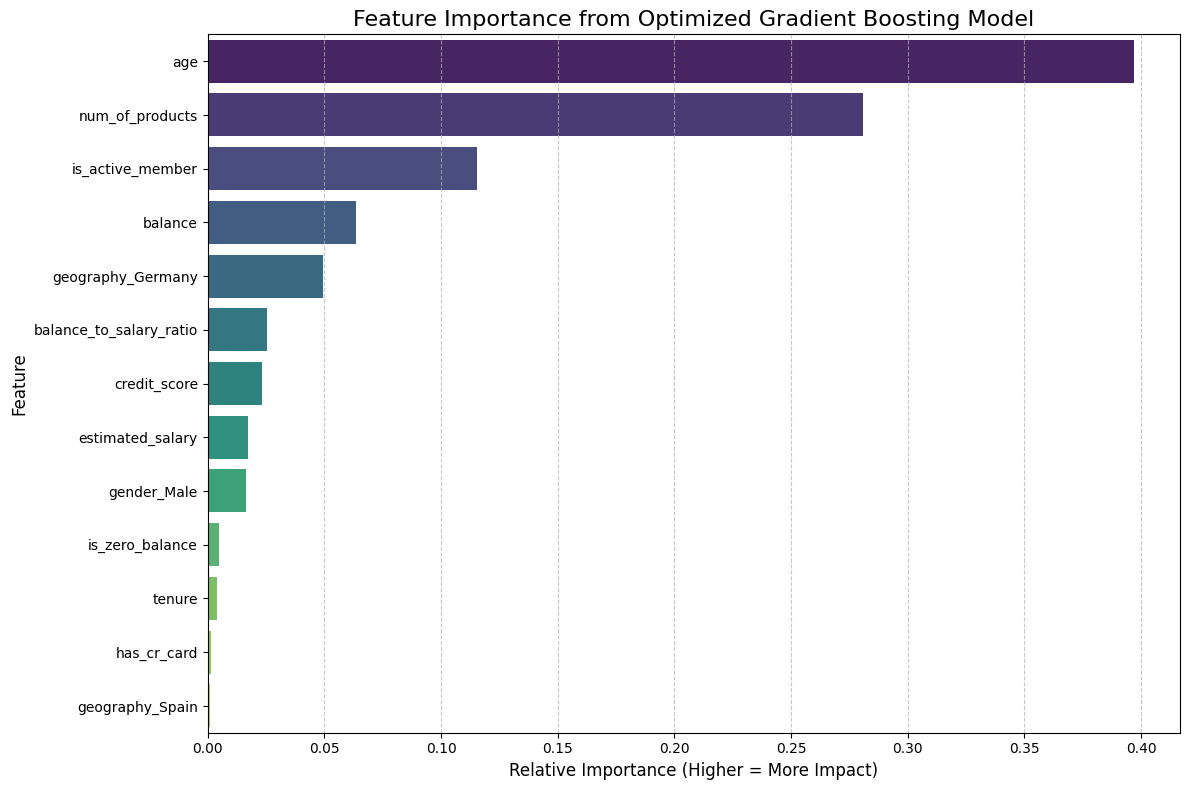


--- Feature Importance Analysis Completed ---

 Summarizing Final Model Performance on Unseen Test Data...
  - Final Model Accuracy:  0.8680
  - Final Model Precision: 0.7942
  - Final Model Recall:    0.4742
  - Final Model F1-Score:  0.5938
  - Final Model ROC-AUC:   0.8685

  - Final Model Confusion Matrix:
[[1543   50]
 [ 214  193]]

  - Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.47      0.59       407

    accuracy                           0.87      2000
   macro avg       0.84      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000


--- Final Model Performance Summary Completed ---

--- Model Interpretation COMPLETED! ---


In [13]:
import pandas as pd
import joblib 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import os 


print("--- Starting Model Interpretation ---")

print("\n Analyzing Feature Importance...")

model_filename = 'optimized_gradient_boosting_churn_model.joblib'

loaded_model = None
if os.path.exists(model_filename):
    loaded_model = joblib.load(model_filename)
    print(f"  - Optimized Gradient Boosting Model '{model_filename}' loaded successfully.")
else:
    print(f"  - Error: Model file '{model_filename}' not found.")
    raise FileNotFoundError(f"Model file '{model_filename}' not found. Cannot proceed with interpretation.")


feature_importances = loaded_model.feature_importances_

if 'X' not in locals(): 
    print("  - Warning: 'X' DataFrame not found in memory. Cannot display feature names.")
    feature_names = [f'Feature_{i}' for i in range(len(feature_importances))] # Fallback names
else:
    feature_names = X.columns 
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})


importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\n  - Top 10 Most Important Features:")
print(importance_df.head(10).to_string(index=False))

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Optimized Gradient Boosting Model', fontsize=16)
plt.xlabel('Relative Importance (Higher = More Impact)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

print("\n--- Feature Importance Analysis Completed ---")


print("\n Summarizing Final Model Performance on Unseen Test Data...")

if 'X_test' not in locals() or 'y_test' not in locals():
    print("  - Error: 'X_test' or 'y_test' not found in memory.")
    raise NameError("Test data (X_test, y_test) not found. Cannot evaluate model.")

y_pred_final = loaded_model.predict(X_test)
y_pred_proba_final = loaded_model.predict_proba(X_test)[:, 1]

accuracy_final = accuracy_score(y_test, y_pred_final)
precision_final = precision_score(y_test, y_pred_final)
recall_final = recall_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final)
roc_auc_final = roc_auc_score(y_test, y_pred_proba_final)
conf_matrix_final = confusion_matrix(y_test, y_pred_final)
class_report_final = classification_report(y_test, y_pred_final)

print(f"  - Final Model Accuracy:  {accuracy_final:.4f}")
print(f"  - Final Model Precision: {precision_final:.4f}")
print(f"  - Final Model Recall:    {recall_final:.4f}")
print(f"  - Final Model F1-Score:  {f1_final:.4f}")
print(f"  - Final Model ROC-AUC:   {roc_auc_final:.4f}")
print("\n  - Final Model Confusion Matrix:")
print(conf_matrix_final)
print("\n  - Final Model Classification Report:")
print(class_report_final)

print("\n--- Final Model Performance Summary Completed ---")

print("\n--- Model Interpretation COMPLETED! ---")

In [17]:
import pandas as pd
import joblib
import os 
from sklearn.preprocessing import StandardScaler 

print("--- Starting Churn Risk Segmentation ---")

print("\n Loading model and original data...")

model_filename = 'optimized_gradient_boosting_churn_model.joblib'
loaded_model = None
if os.path.exists(model_filename):
    loaded_model = joblib.load(model_filename)
    print(f"  - Optimized Gradient Boosting Model '{model_filename}' loaded successfully.")
else:
    print(f"  - Error: Model file '{model_filename}' not found.")
    print("    Please ensure that the model was saved correctly.")
    raise FileNotFoundError(f"Model file '{model_filename}' not found. Cannot proceed with segmentation.")

expected_features_from_model = list(loaded_model.feature_names_in_)
print(f"  - Model expects {len(expected_features_from_model)} features. Example: {expected_features_from_model[:5]}...")


original_data_path = 'Churn_Modelling.csv'
if os.path.exists(original_data_path):
    original_data = pd.read_csv(original_data_path)
    print(f"  - Original data '{original_data_path}' loaded successfully.")
else:
    print(f"  - Error: Original data file '{original_data_path}' not found.")
    print("    Please ensure the dataset is in the correct path.")
    raise FileNotFoundError(f"Original data file '{original_data_path}' not found. Cannot proceed.")


print("\n Re-applying preprocessing steps to create 'X' for all customers...")

df_processed = original_data.copy()

df_processed.columns = df_processed.columns.str.lower()
print("  - All original_data column names converted to lowercase for consistency.")

columns_to_drop_from_df_processed = ['rownumber', 'surname', 'customerid', 'exited']
df_processed = df_processed.drop(columns=columns_to_drop_from_df_processed, errors='ignore')
print(f"  - Dropped non-feature columns: {columns_to_drop_from_df_processed}")


df_processed['gender'] = df_processed['gender'].map({'female': 0, 'male': 1})

df_processed = pd.get_dummies(df_processed, columns=['geography'], drop_first=True, dtype=int)

df_processed['balancetosalaryratio'] = df_processed.apply(
    lambda row: row['balance'] / row['estimatedsalary'] if row['estimatedsalary'] > 0 else 0, axis=1
)
df_processed['haszerobalance'] = (df_processed['balance'] == 0).astype(int)


numerical_cols = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary', 'balancetosalaryratio']
numerical_cols = [col for col in numerical_cols if col in df_processed.columns] 

scaler = StandardScaler()
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])


X = df_processed.reindex(columns=expected_features_from_model, fill_value=0)


if not all(X.columns == expected_features_from_model):
   
    print(f"    Features missing in X: {set(expected_features_from_model) - set(X.columns)}")
    print(f"    Extra features in X: {set(X.columns) - set(expected_features_from_model)}")
    
else:
    print("  - 'X' (preprocessed features for all customers) successfully created and aligned with model's expected features.")

print(f"  - Final X shape: {X.shape}")
print(f"  - Final X columns (first 5): {list(X.columns)[:5]}...")



print("\n Generating churn probabilities for all customers...")

churn_probabilities = loaded_model.predict_proba(X)[:, 1]

print(f"  - Generated {len(churn_probabilities)} churn probabilities.")
print(f"  - Example probabilities (first 5): {churn_probabilities[:5].round(4)}")



print("\n Creating DataFrame with Customer IDs and Probabilities...")
customer_risk_df = pd.DataFrame({
    'CustomerID': original_data['CustomerId'], 
    'ChurnProbability': churn_probabilities
})

print("  - DataFrame head:")
print(customer_risk_df.head())



print("\n Defining and assigning churn risk segments...")


high_risk_threshold = 0.70  
medium_risk_threshold = 0.30 


def assign_churn_segment(probability):
    if probability >= high_risk_threshold:
        return 'High Risk'
    elif probability >= medium_risk_threshold:
        return 'Medium Risk'
    else:
        return 'Low Risk'

customer_risk_df['ChurnSegment'] = customer_risk_df['ChurnProbability'].apply(assign_churn_segment)

print("  - Distribution of Churn Segments:")
print(customer_risk_df['ChurnSegment'].value_counts())
print("  - Average Churn Probability by Segment:")
print(customer_risk_df.groupby('ChurnSegment')['ChurnProbability'].mean().sort_values())


print("\n Consolidating all data for Power BI export...")


final_powerbi_df = original_data[[
    'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
    'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
    'EstimatedSalary', 'Exited'
]].copy()

final_powerbi_df = pd.merge(final_powerbi_df, customer_risk_df[['CustomerID', 'ChurnProbability', 'ChurnSegment']],
                            left_on='CustomerId', right_on='CustomerID', how='left')

final_powerbi_df = final_powerbi_df.drop(columns=['CustomerID'])


print("  - Consolidated DataFrame for Power BI (first 5 rows):")
print(final_powerbi_df.head())
print(f"  - Shape of final DataFrame for Power BI: {final_powerbi_df.shape}")


print("\n Performing final sanity checks...")

print("\n  - Value Counts for Churn Segments (Final DataFrame):")
print(final_powerbi_df['ChurnSegment'].value_counts())

print("\n  - Average Churn Probability by Segment (Final DataFrame):")
print(final_powerbi_df.groupby('ChurnSegment')['ChurnProbability'].mean().sort_values())

print("\n--- Churn Risk Segmentation COMPLETED! ---")

--- Starting Churn Risk Segmentation ---

 Loading model and original data...
  - Optimized Gradient Boosting Model 'optimized_gradient_boosting_churn_model.joblib' loaded successfully.
  - Model expects 13 features. Example: ['credit_score', 'age', 'tenure', 'balance', 'num_of_products']...
  - Original data 'Churn_Modelling.csv' loaded successfully.

 Re-applying preprocessing steps to create 'X' for all customers...
  - All original_data column names converted to lowercase for consistency.
  - Dropped non-feature columns: ['rownumber', 'surname', 'customerid', 'exited']
  - 'X' (preprocessed features for all customers) successfully created and aligned with model's expected features.
  - Final X shape: (10000, 13)
  - Final X columns (first 5): ['credit_score', 'age', 'tenure', 'balance', 'num_of_products']...

 Generating churn probabilities for all customers...
  - Generated 10000 churn probabilities.
  - Example probabilities (first 5): [0.0853 0.0948 0.0786 0.0791 0.1146]

 Creat

In [20]:
import pandas as pd
import os 

print("--- Preparing Data for Power BI ---")


print("\n Verifying the 'final_powerbi_df' structure...")
if 'final_powerbi_df' in locals() and isinstance(final_powerbi_df, pd.DataFrame):
    print("  - 'final_powerbi_df' is present and is a DataFrame.")
    print("  - First 5 rows of final_powerbi_df:")
    print(final_powerbi_df.head())
    print(f"  - Shape of final_powerbi_df: {final_powerbi_df.shape}")
else:
    print("  - ERROR: 'final_powerbi_df' not found or not a DataFrame.")
    print("    Please ensure Phase 6.1 was run successfully before this step.")
    raise NameError("'final_powerbi_df' not found. Cannot proceed with export.")


output_csv_filename = 'customer_churn_insights_for_powerbi.csv'

print(f"\n Exporting 'final_powerbi_df' to '{output_csv_filename}'...")

try:
   
    final_powerbi_df.to_csv(output_csv_filename, index=False, encoding='utf-8')
    print(f"  - Data successfully exported to '{output_csv_filename}'.")
except Exception as e:
    print(f"  - ERROR during CSV export: {e}")
    raise

print(f"\n Verifying if '{output_csv_filename}' was created...")
if os.path.exists(output_csv_filename):
    print(f"  - File '{output_csv_filename}' found in the current directory.")
   
else:
    print(f"  - ERROR: File '{output_csv_filename}' not found after export.")

print("\n--- Preparing Data for Power BI COMPLETED! ---")
print(f" Import '{output_csv_filename}' into Power BI Desktop.")

--- Preparing Data for Power BI ---

 Verifying the 'final_powerbi_df' structure...
  - 'final_powerbi_df' is present and is a DataFrame.
  - First 5 rows of final_powerbi_df:
   CustomerId  CreditScore Geography  Gender  Age  Tenure    Balance  \
0    15634602          619    France  Female   42       2       0.00   
1    15647311          608     Spain  Female   41       1   83807.86   
2    15619304          502    France  Female   42       8  159660.80   
3    15701354          699    France  Female   39       1       0.00   
4    15737888          850     Spain  Female   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0               1        112542.58       0   
2              3          1               0        113931.57       1   
3              2          0               0         93826.63       0   
4              1          1    